In [1]:
import os
import numpy as np
import xarray as xr
import geopandas as gpd

import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

## 3h Products

In [2]:
yy_s, yy_e = 2002, 2023
lon_min, lon_max, lat_min, lat_max = 10.5, 13.5, 44.5, 47

In [3]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite')

In [4]:
veneto_dir = os.path.join('/','media','arturo','Arturo','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    VENETO = gpd.read_file(os.path.join(veneto_dir,'Veneto.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [5]:
seasons = {
    "winter": [12, 1, 2], 
    "spring": [3, 4, 5],
    "summer": [6, 7, 8],
    "autumn": [9, 10, 11]
}

In [6]:
dir_data = os.path.join(dir_base,'IMERG','3h','IMERG_Italy_3h_2001_01_01_2023_12_31.nc')
DATA = xr.open_dataset(dir_data)
DATA = DATA.sel(time=DATA.time.dt.year.isin([np.arange(yy_s,yy_e+1)]))
DATA = DATA.sel(lat=slice(lat_min-1.5, lat_max+1.5), lon=slice(lon_min-1.5, lon_max+1.5))
DATA = DATA.resample(time ='D').sum(dim='time', skipna=False)
DATA = DATA.where(DATA >= 0)  # Reemplaza valores negativos con NaN

IMERG_lon2d, IMERG_lat2d = np.meshgrid(DATA['lon'].values, DATA['lat'].values)

IMERG_SU = DATA.sel(time=DATA.time.dt.month.isin(seasons["summer"]))
IMERG_AU = DATA.sel(time=DATA.time.dt.month.isin(seasons["autumn"]))
IMERG_WI = DATA.sel(time=DATA.time.dt.month.isin(seasons["winter"]))
IMERG_SP = DATA.sel(time=DATA.time.dt.month.isin(seasons["spring"]))

del DATA

In [7]:
dir_data = os.path.join(dir_base,'CMORPH','3h','CMORPH_Italy_3hr_1998_01_01_2023_12_31.nc')
DATA = xr.open_dataset(dir_data)
DATA = DATA.sel(time=DATA.time.dt.year.isin([np.arange(yy_s,yy_e+1)]))
DATA = DATA.sel(lat=slice(lat_min-1.5, lat_max+1.5), lon=slice(lon_min-1.5, lon_max+1.5))
DATA = DATA.resample(time ='D').sum(dim='time', skipna=False)
DATA = DATA.where(DATA >= 0)  # Reemplaza valores negativos con NaN

CMORPH_lon2d, CMORPH_lat2d = np.meshgrid(DATA['lon'].values, DATA['lat'].values)

CMORPH_SU = DATA.sel(time=DATA.time.dt.month.isin(seasons["summer"]))
CMORPH_AU = DATA.sel(time=DATA.time.dt.month.isin(seasons["autumn"]))
CMORPH_WI = DATA.sel(time=DATA.time.dt.month.isin(seasons["winter"]))
CMORPH_SP = DATA.sel(time=DATA.time.dt.month.isin(seasons["spring"]))

del DATA

In [8]:
dir_data = os.path.join(dir_base,'ERA5','3h','ERA5_Italy_3h_2000_01_01_2023_12_31.nc')
DATA = xr.open_dataset(dir_data)
DATA = DATA.sel(time=DATA.time.dt.year.isin([np.arange(yy_s,yy_e+1)]))
DATA = DATA.sel(lat=slice(lat_max+1.5, lat_min-1.5), lon=slice(lon_min-1.5, lon_max+1.5))
DATA = DATA.resample(time ='D').sum(dim='time', skipna=False)
DATA = DATA.where(DATA >= 0)  # Reemplaza valores negativos con NaN

ERA5_lon2d, ERA5_lat2d = np.meshgrid(DATA['lon'].values, DATA['lat'].values)

ERA5_SU = DATA.sel(time=DATA.time.dt.month.isin(seasons["summer"]))
ERA5_AU = DATA.sel(time=DATA.time.dt.month.isin(seasons["autumn"]))
ERA5_WI = DATA.sel(time=DATA.time.dt.month.isin(seasons["winter"]))
ERA5_SP = DATA.sel(time=DATA.time.dt.month.isin(seasons["spring"]))

del DATA

In [9]:
dir_data = os.path.join(dir_base,'GSMaP','3h','GSMaP_Italy_3h_2002_01_01_2024_12_31.nc')
DATA = xr.open_dataset(dir_data)
DATA = DATA.sel(time=DATA.time.dt.year.isin([np.arange(yy_s,yy_e+1)]))
DATA = DATA.sel(lat=slice(lat_max+1.5, lat_min-1.5), lon=slice(lon_min-1.5, lon_max+1.5))
DATA = DATA.resample(time ='D').sum(dim='time', skipna=False)
DATA = DATA.where(DATA >= 0)  # Reemplaza valores negativos con NaN

GSMaP_lon2d, GSMaP_lat2d = np.meshgrid(DATA['lon'].values, DATA['lat'].values)

GSMaP_SU = DATA.sel(time=DATA.time.dt.month.isin(seasons["summer"]))
GSMaP_AU = DATA.sel(time=DATA.time.dt.month.isin(seasons["autumn"]))
GSMaP_WI = DATA.sel(time=DATA.time.dt.month.isin(seasons["winter"]))
GSMaP_SP = DATA.sel(time=DATA.time.dt.month.isin(seasons["spring"]))

del DATA

In [10]:
dir_data = os.path.join(dir_base,'MSWEP','3h','MSWEP_Italy_3h_1980_01_01_2023_12_31.nc')
DATA = xr.open_dataset(dir_data)
DATA = DATA.sel(time=DATA.time.dt.year.isin([np.arange(yy_s,yy_e+1)]))
DATA = DATA.sel(lat=slice(lat_max+1.5, lat_min-1.5), lon=slice(lon_min-1.5, lon_max+1.5))
DATA = DATA.resample(time ='D').sum(dim='time', skipna=False)
DATA = DATA.where(DATA >= 0)  # Reemplaza valores negativos con NaN

MSWEP_lon2d, MSWEP_lat2d = np.meshgrid(DATA['lon'].values, DATA['lat'].values)

MSWEP_SU = DATA.sel(time=DATA.time.dt.month.isin(seasons["summer"]))
MSWEP_AU = DATA.sel(time=DATA.time.dt.month.isin(seasons["autumn"]))
MSWEP_WI = DATA.sel(time=DATA.time.dt.month.isin(seasons["winter"]))
MSWEP_SP = DATA.sel(time=DATA.time.dt.month.isin(seasons["spring"]))

del DATA

Text(0.0, 1.0, 'MSWEP')

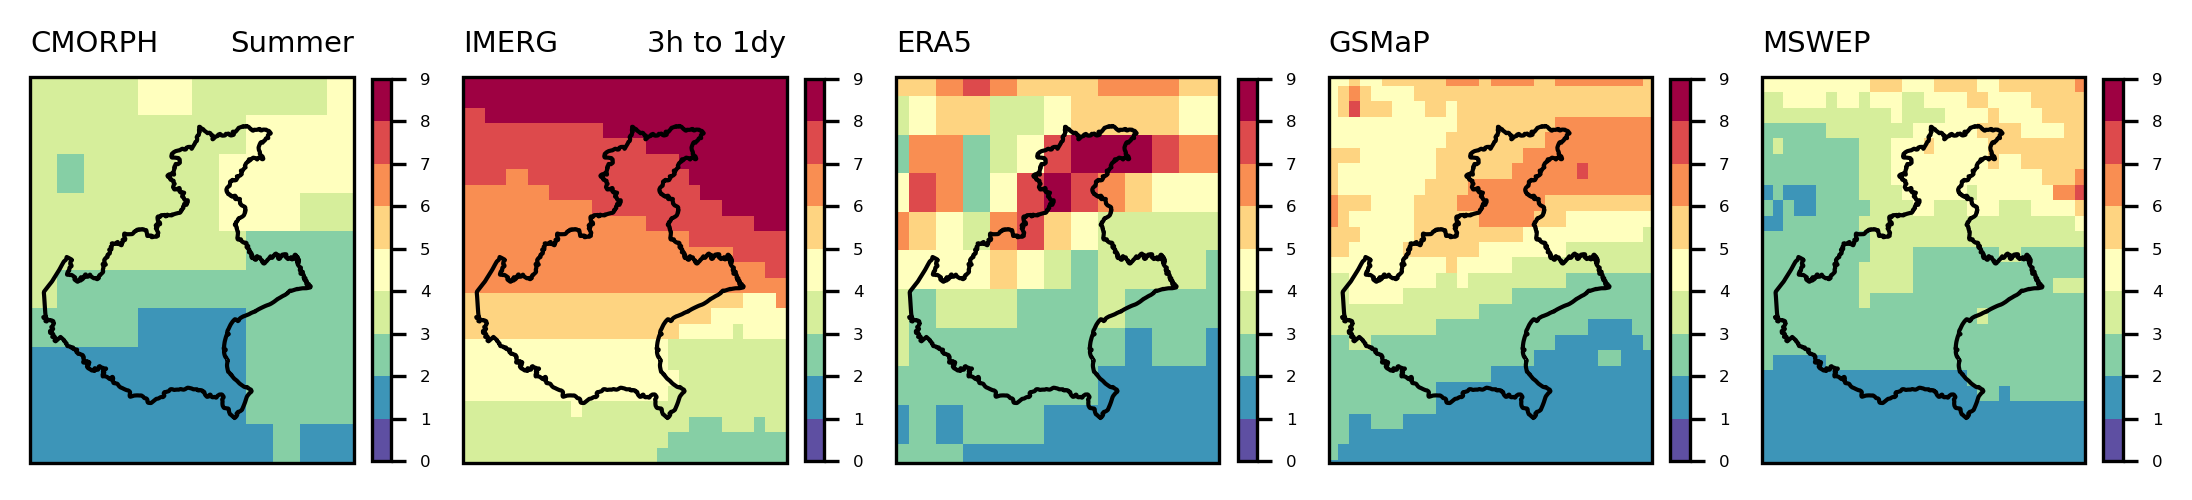

In [11]:
levels = np.arange(0,10,1)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)
# norm = None

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,5)

ax1 = plt.subplot(gs[0, 0], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(CMORPH_lon2d, CMORPH_lat2d, CMORPH_SU.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('CMORPH', fontsize=7, loc='left')
ax1.set_title('Summer', fontsize=7, loc='right')

ax1 = plt.subplot(gs[0, 1], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(IMERG_lon2d, IMERG_lat2d, IMERG_SU.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('IMERG', fontsize=7, loc='left')
ax1.set_title('3h to 1dy', fontsize=7, loc='right')

ax1 = plt.subplot(gs[0, 2], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(ERA5_lon2d, ERA5_lat2d, ERA5_SU.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('ERA5', fontsize=7, loc='left')

ax1 = plt.subplot(gs[0, 3], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(GSMaP_lon2d, GSMaP_lat2d, GSMaP_SU.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('GSMaP', fontsize=7, loc='left')

ax1 = plt.subplot(gs[0, 4], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(MSWEP_lon2d, MSWEP_lat2d, MSWEP_SU.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('MSWEP', fontsize=7, loc='left')

Text(0.0, 1.0, 'MSWEP')

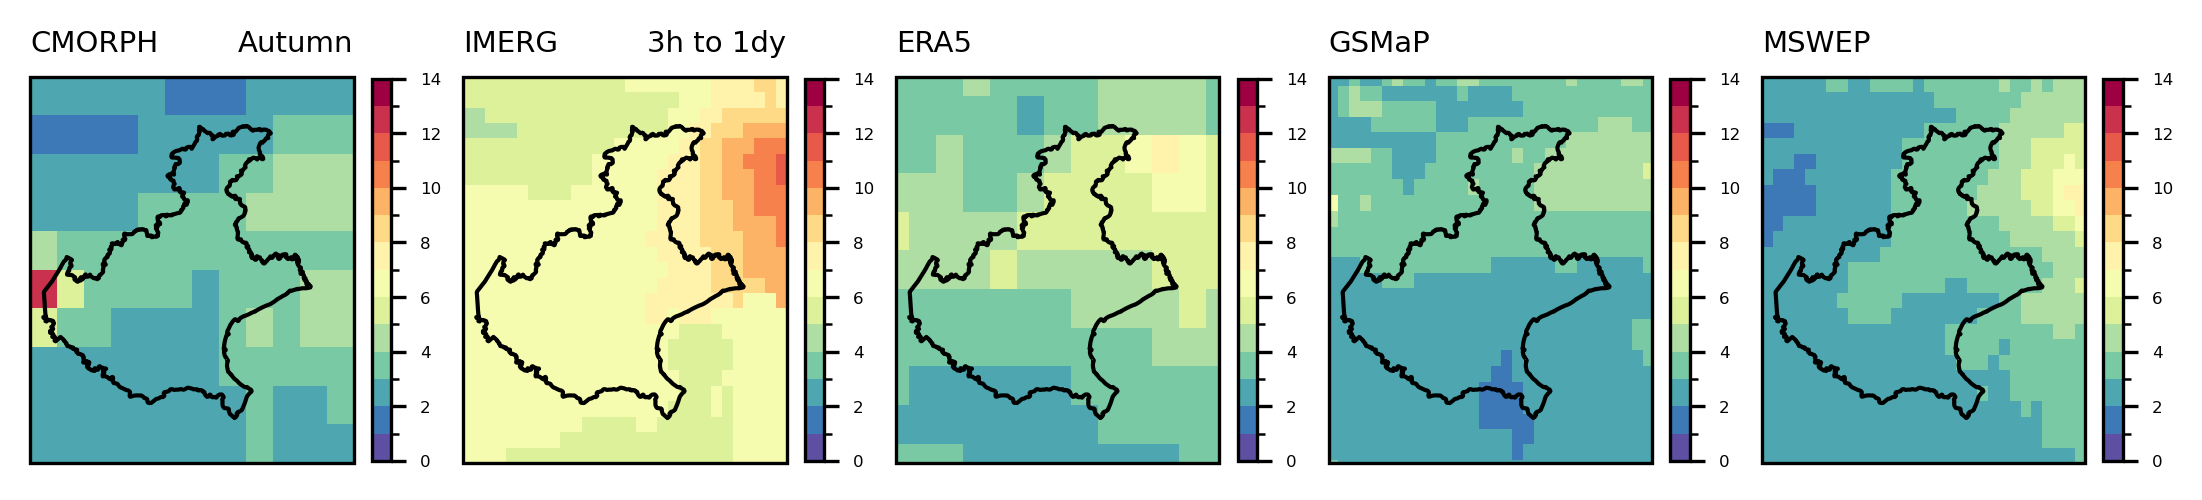

In [12]:
levels = np.arange(0,15,1)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)
# norm = None

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,5)

ax1 = plt.subplot(gs[0, 0], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(CMORPH_lon2d, CMORPH_lat2d, CMORPH_AU.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('CMORPH', fontsize=7, loc='left')
ax1.set_title('Autumn', fontsize=7, loc='right')

ax1 = plt.subplot(gs[0, 1], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(IMERG_lon2d, IMERG_lat2d, IMERG_AU.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('IMERG', fontsize=7, loc='left')
ax1.set_title('3h to 1dy', fontsize=7, loc='right')

ax1 = plt.subplot(gs[0, 2], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(ERA5_lon2d, ERA5_lat2d, ERA5_AU.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('ERA5', fontsize=7, loc='left')

ax1 = plt.subplot(gs[0, 3], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(GSMaP_lon2d, GSMaP_lat2d, GSMaP_AU.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('GSMaP', fontsize=7, loc='left')

ax1 = plt.subplot(gs[0, 4], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(MSWEP_lon2d, MSWEP_lat2d, MSWEP_AU.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('MSWEP', fontsize=7, loc='left')

Text(0.0, 1.0, 'MSWEP')

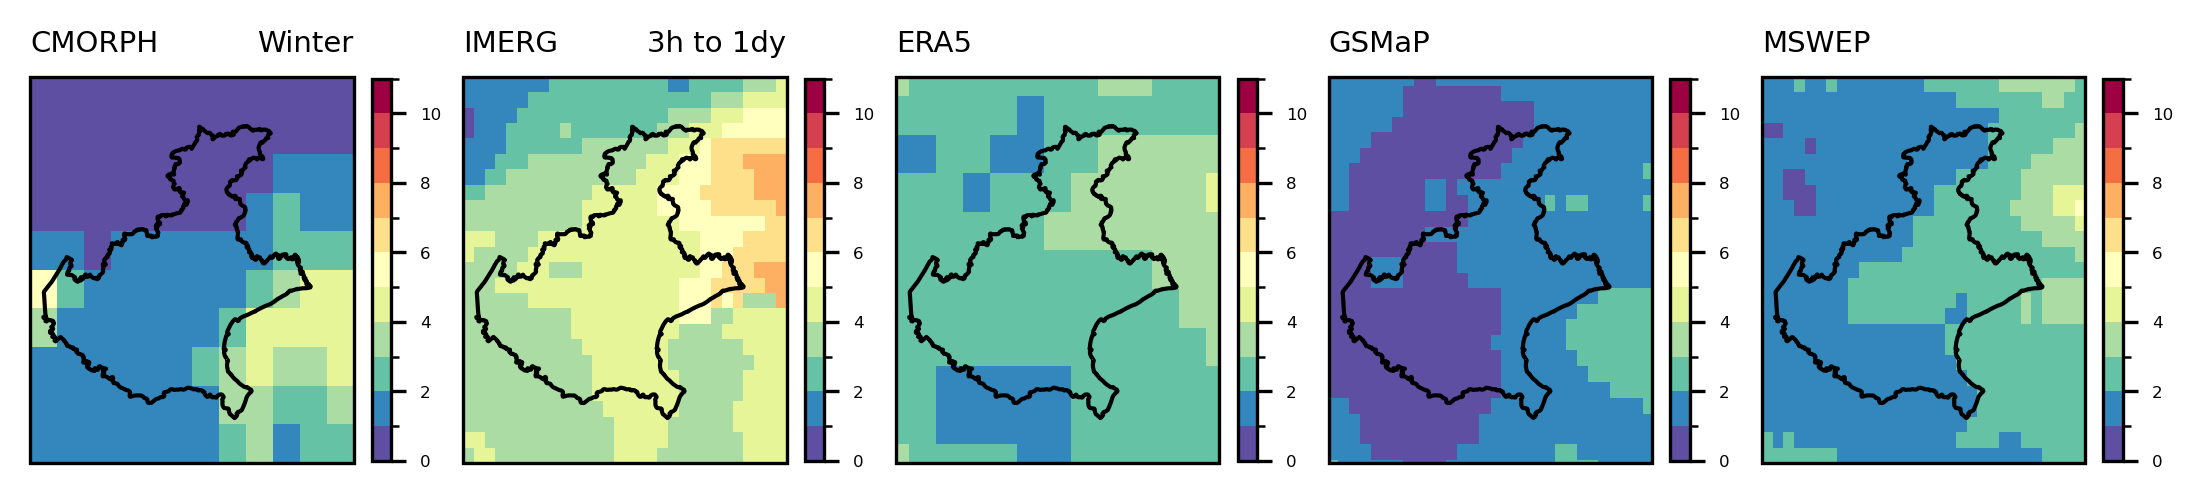

In [13]:
levels = np.arange(0,12,1)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)
# norm = None

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,5)

ax1 = plt.subplot(gs[0, 0], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(CMORPH_lon2d, CMORPH_lat2d, CMORPH_WI.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('CMORPH', fontsize=7, loc='left')
ax1.set_title('Winter', fontsize=7, loc='right')

ax1 = plt.subplot(gs[0, 1], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(IMERG_lon2d, IMERG_lat2d, IMERG_WI.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('IMERG', fontsize=7, loc='left')
ax1.set_title('3h to 1dy', fontsize=7, loc='right')

ax1 = plt.subplot(gs[0, 2], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(ERA5_lon2d, ERA5_lat2d, ERA5_WI.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('ERA5', fontsize=7, loc='left')

ax1 = plt.subplot(gs[0, 3], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(GSMaP_lon2d, GSMaP_lat2d, GSMaP_WI.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('GSMaP', fontsize=7, loc='left')

ax1 = plt.subplot(gs[0, 4], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(MSWEP_lon2d, MSWEP_lat2d, MSWEP_WI.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('MSWEP', fontsize=7, loc='left')

Text(0.0, 1.0, 'MSWEP')

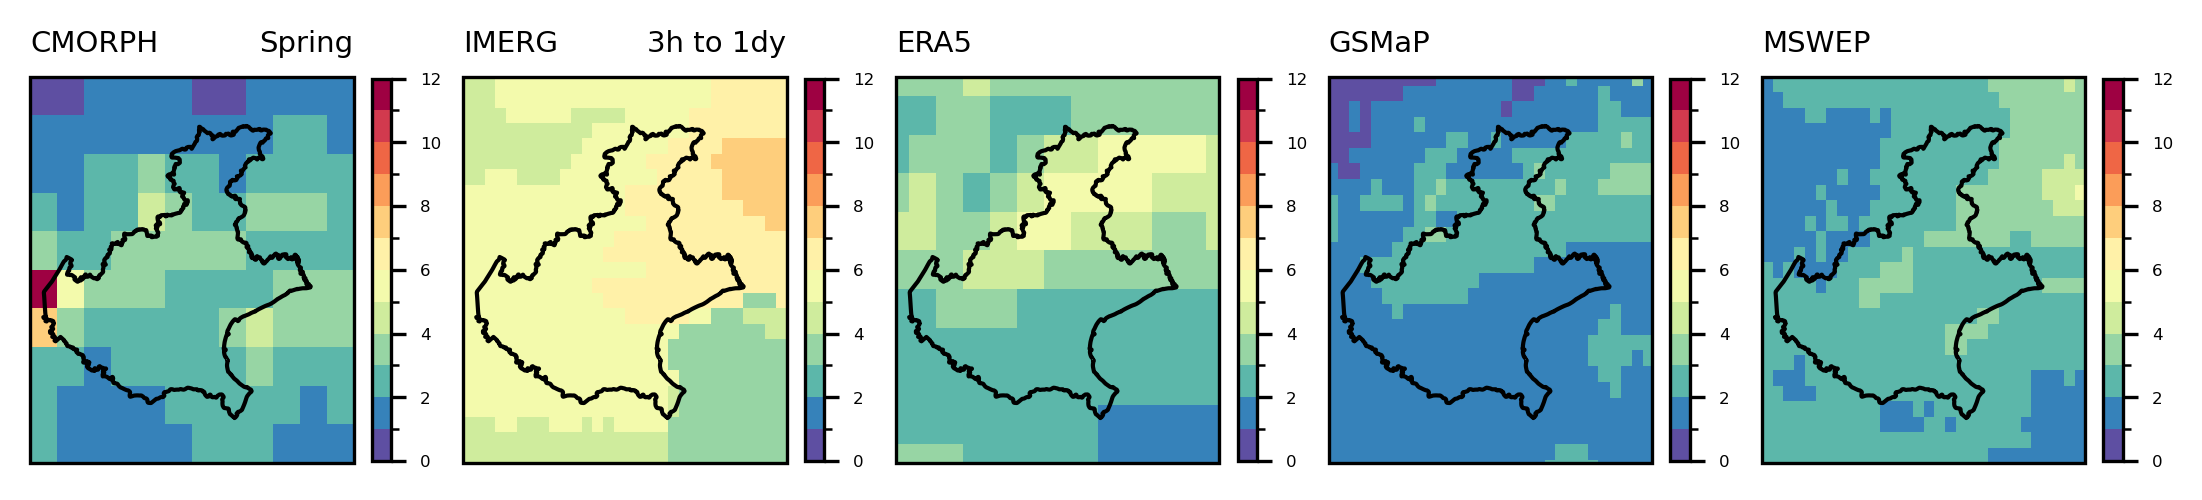

In [14]:
levels = np.arange(0,13,1)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)
# norm = None

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,5)

ax1 = plt.subplot(gs[0, 0], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(CMORPH_lon2d, CMORPH_lat2d, CMORPH_SP.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('CMORPH', fontsize=7, loc='left')
ax1.set_title('Spring', fontsize=7, loc='right')

ax1 = plt.subplot(gs[0, 1], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(IMERG_lon2d, IMERG_lat2d, IMERG_SP.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('IMERG', fontsize=7, loc='left')
ax1.set_title('3h to 1dy', fontsize=7, loc='right')

ax1 = plt.subplot(gs[0, 2], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(ERA5_lon2d, ERA5_lat2d, ERA5_SP.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('ERA5', fontsize=7, loc='left')

ax1 = plt.subplot(gs[0, 3], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(GSMaP_lon2d, GSMaP_lat2d, GSMaP_SP.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('GSMaP', fontsize=7, loc='left')

ax1 = plt.subplot(gs[0, 4], projection=proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
VENETO.plot(facecolor='None', ax=ax1, zorder=10)
a1 = ax1.pcolormesh(MSWEP_lon2d, MSWEP_lat2d, MSWEP_SP.mean(dim='time',skipna=True)['PRE'], cmap=cmap, norm=norm)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('MSWEP', fontsize=7, loc='left')